In [1]:
from helpers import *
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

def plot_circle(points, c, r, l):
    fig, ax = plt.subplots(figsize=(4,4))

    s_x = [s_i[0] for s_i in points]
    s_y = [s_i[1] for s_i in points]

    pad = 0.3

    ax.scatter(s_x, s_y, vmin=0, vmax=100)
    ax.set( xlim=(-pad,l-1+pad), xticks=(np.arange(0,l)),
            ylim=(-pad,l-1+pad), yticks=(np.arange(0,l)) )

    # calculate sphere lines
    l_ = (c[0] - r, c[1])

    r_ = (c[0] + r, c[1])

    u_ = (c[0], c[1] + r)

    d_ = (c[0], c[1] - r)

    ax.plot(c[0], c[1], 'rs')
    ax.plot([l_[0], d_[0]], [l_[1], d_[1]], color='red')
    ax.plot([l_[0], u_[0]], [l_[1], u_[1]], color='red')
    ax.plot([r_[0], d_[0]], [r_[1], d_[1]], color='red')
    ax.plot([r_[0], u_[0]], [r_[1], u_[1]], color='red')

    plt.show()

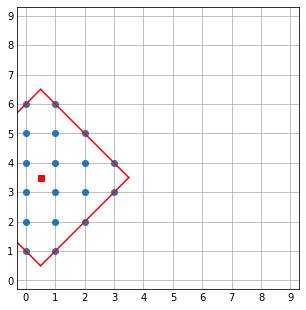

In [2]:
c=(0.5, 3.5)
r=3
d=2
l=10

s = get_m_sphere(c, r, d, l)

plot_circle(s, c, r, l)

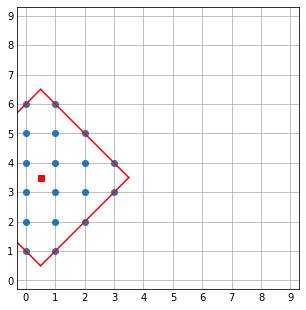

In [4]:
ss = get_sphere(c, r, d, l)
plot_circle(ss, c, r, l)

In [42]:
def get_min_circle(points):
    center = get_center(points)
    max_dist = 0
    for p in points:
        if manhattan_dist(p, center) > max_dist:
            max_dist = manhattan_dist(p, center)
    return center, max_dist

In [22]:
from hamiltonians import *
from qite_params import QITE_params as QP
from helpers import *

Ham = ShortRangeHeisenberg(4, [1,1,1])
Ham.multiply_scalar(1j)
params = QP(Ham)

params.load_hamiltonian_params(4)

Loading Hamiltonian Parameters... Calculating Unitary Domains... Done
Calculating Required Odd-Y Pauli Strings... Done
Calculating Required Pauli Measurements... Done


In [23]:
Ham.print()

Term 1 acting on the qubit locations [0, 1]:
	(0.00 + 1.00i) X_0 X_1 +
	(0.00 + 1.00i) Y_0 Y_1 +
	(0.00 + 1.00i) Z_0 Z_1 
Term 2 acting on the qubit locations [1, 2]:
	(0.00 + 1.00i) X_1 X_2 +
	(0.00 + 1.00i) Y_1 Y_2 +
	(0.00 + 1.00i) Z_1 Z_2 
Term 3 acting on the qubit locations [2, 3]:
	(0.00 + 1.00i) X_2 X_3 +
	(0.00 + 1.00i) Y_2 Y_3 +
	(0.00 + 1.00i) Z_2 Z_3 


In [24]:
params.measurement_keys

{0: [{0: 1, 1: 1},
  {0: 2, 1: 2},
  {0: 3, 1: 3},
  {0: 0, 1: 1, 2: 0},
  {0: 2, 1: 3, 2: 0},
  {0: 3, 1: 2, 2: 0},
  {0: 1, 1: 0, 2: 0},
  {0: 1, 1: 2, 2: 0},
  {0: 1, 1: 3, 2: 0},
  {0: 3, 1: 0, 2: 0},
  {0: 2, 1: 0, 2: 0},
  {0: 0, 1: 3, 2: 0},
  {0: 0, 1: 2, 2: 0},
  {0: 2, 1: 1, 2: 0},
  {0: 3, 1: 1, 2: 0},
  {0: 0, 1: 0, 2: 1},
  {0: 0, 1: 1, 2: 1},
  {0: 2, 1: 2, 2: 1},
  {0: 3, 1: 2, 2: 1},
  {0: 1, 1: 2, 2: 1},
  {0: 0, 1: 3, 2: 1},
  {0: 2, 1: 3, 2: 1},
  {0: 3, 1: 3, 2: 1},
  {0: 1, 1: 3, 2: 1},
  {0: 0, 1: 2, 2: 1},
  {0: 1, 1: 0, 2: 1},
  {0: 3, 1: 0, 2: 1},
  {0: 2, 1: 1, 2: 1},
  {0: 2, 1: 0, 2: 1},
  {0: 3, 1: 1, 2: 1},
  {0: 1, 1: 1, 2: 1},
  {0: 2, 1: 0, 2: 2},
  {0: 2, 1: 1, 2: 2},
  {0: 0, 1: 2, 2: 2},
  {0: 1, 1: 2, 2: 2},
  {0: 3, 1: 2, 2: 2},
  {0: 2, 1: 3, 2: 2},
  {0: 2, 1: 0, 2: 3},
  {0: 2, 1: 1, 2: 3},
  {0: 0, 1: 2, 2: 3},
  {0: 1, 1: 2, 2: 3},
  {0: 3, 1: 2, 2: 3},
  {0: 2, 1: 3, 2: 3},
  {0: 3, 1: 0, 2: 2},
  {0: 3, 1: 1, 2: 2},
  {0: 2, 1: 2, 2: 2},
  {

In [27]:
len(params.measurement_keys[2])

63

In [14]:
m = 0
hm = Ham.hm_list[m]
print(hm)

[[15], [1], [0, 1]]


In [19]:
c, R = min_bounding_sphere(hm[2])
h_domain = get_m_sphere(c, R, Ham.d, Ham.l)
u_domain = params.u_domains[m]
print(c,R)
print(h_domain)
print(u_domain)

domain_ops = params.odd_y_strings[len(u_domain)]

# List of pauli dictionaries for the operators of the unitary's domain
u_ops = [
    pauli_index_to_dict(domain_ops[j], u_domain) for j in range(len(domain_ops))
]

# List of pauli dictionaries for the operators of the unitary's domain
h_ops = [
    pauli_index_to_dict(hm[0][j], hm[2]) for j in range(len(hm[0]))
]

print(u_ops)
print(h_ops)

0.5 0.5
[(0,), (1,)]
[(0,), (1,)]
[{(0,): 2, (1,): 0}, {(0,): 2, (1,): 1}, {(0,): 0, (1,): 2}, {(0,): 1, (1,): 2}, {(0,): 3, (1,): 2}, {(0,): 2, (1,): 3}]
[{0: 3, 1: 3}]


In [ ]:
prods = {}
for n in range(1,10):
    prods[n] = []
    oy = odd_y_pauli_strings(n)
    for i in oy:
        for j in oy:
#             if j >= i:
#                 break
            p_,c_ = pauli_string_prod(i, j, n)
            if p_ not in prods[n]:
                prods[n].append(p_)

    print('n={} -- generated strings: {}'.format(n, len(prods[n])))

n=1 -- generated strings: 1
n=2 -- generated strings: 16
n=3 -- generated strings: 64
n=4 -- generated strings: 256
n=5 -- generated strings: 1024


#### Checking how many Pauli Strings can be made (up to a phase factor) with only odd-Y Pauli strings

In [7]:
pprod = {
    'I': {i: i for i in 'IXYZ'},
    'X': {'I': 'X', 'X':'I', 'Y': 'Z', 'Z': 'Y'},
    'Y': {'I': 'Y', 'X':'Z', 'Y': 'I', 'Z': 'X'},
    'Z': {'I': 'Z', 'X':'Y', 'Y': 'X', 'Z': 'I'},
}
def sprod(s1,s2):
    prod = ''
    for i in range(len(s1)):
        prod += pprod[s1[i]][s2[i]]
    return prod
def y_count(s):
    c = 0
    for i in s:
        if i == 'Y':
            c += 1
    return c

In [46]:
P_ = 'IXYZ'
l = len(P_)
d = 3
lc = [0] * d

odd_ys = []
while True:
    # loop logic
    # Calculate string
    s = ''
    for j in range(d):
        s += P_[lc[j]]
        
    if y_count(s) % 2 == 1:
        odd_ys.append(s)
    
    # Termination logic
    if s == 'Z' * d:
        break
    # update
    j = 0
    while True:
        lc[j] += 1
        if lc[j] == l:
            lc[j] = 0
            j += 1
        else:
            break
print(len(odd_ys))
prods = []
for s1 in odd_ys:
    for s2 in odd_ys:
        prods.append(sprod(s1,s2))
import numpy as np

np.log(len(set(prods)))/np.log(4)

28


3.0

In [62]:
def foo(d):
    return 2**(d-1) * (2**d - 1)
D = 8
oys = [foo(d) for d in range(1,D+1,1)]
tri = [ (foo(d)**2 - foo(d))//2 for d in range(1,D+1,1) ]
print(oys, tri)


[1, 6, 28, 120, 496, 2016, 8128, 32640] [0, 15, 378, 7140, 122760, 2031120, 33028128, 532668480]


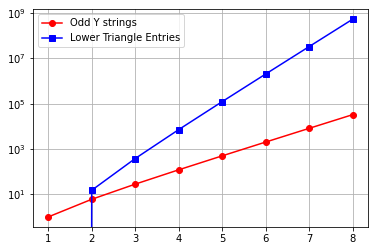

In [63]:
import matplotlib.pyplot as plt
plt.plot(range(1,D+1,1), oys, 'ro-', label='Odd Y strings')
plt.plot(range(1,D+1,1), tri, 'bs-', label='Lower Triangle Entries')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

In [1]:
from helpers import *
from qiskit import QuantumCircuit

q_map = {(0,0): 0, (0,1): 1, (1,0): 2, (1,1): 3}
ps = 0*1 + 1*4 + 2*16 + 3*64
pd = pauli_index_to_dict(ps, [ (1,1), (1,0), (0,1), (0,0) ])
print(q_map)
print(pd)
bases = get_qc_bases_from_pauli_dict(pd, q_map)
print(bases)

qc = QuantumCircuit(4, 4)
for qbit in bases.keys():
    gate = bases[qbit]
    if gate == 1:
        qc.x(qbit)
    elif gate == 2:
        qc.y(qbit)
    elif gate == 3:
        qc.z(qbit)
qc.draw()

{(0, 0): 0, (0, 1): 1, (1, 0): 2, (1, 1): 3}
{(1, 1): 0, (1, 0): 1, (0, 1): 2, (0, 0): 3}
{2: 1, 1: 2, 0: 3}


┌───┐
q_0: ┤ Z ├
     ├───┤
q_1: ┤ Y ├
     ├───┤
q_2: ┤ X ├
     └───┘
q_3: ─────
          
c: 4/═════

In [2]:
pauli_string_exp(qc, pd, q_map, np.pi/4)
qc.draw()

┌───┐                ┌───┐┌─────────┐┌───┐                 
q_0: ┤ Z ├────────────────┤ X ├┤ Rz(π/4) ├┤ X ├─────────────────
     ├───┤┌─────────┐┌───┐└─┬─┘└─────────┘└─┬─┘┌───┐┌──────────┐
q_1: ┤ Y ├┤ Rx(π/2) ├┤ X ├──■───────────────■──┤ X ├┤ Rx(-π/2) ├
     ├───┤└──┬───┬──┘└─┬─┘                     └─┬─┘└──┬───┬───┘
q_2: ┤ X ├───┤ H ├─────■─────────────────────────■─────┤ H ├────
     └───┘   └───┘                                     └───┘    
q_3: ───────────────────────────────────────────────────────────
                                                                
c: 4/═══════════════════════════════════════════════════════════

In [3]:
from qiskit import Aer
sv_sim = Aer.get_backend('statevector_simulator')

In [4]:
e, c = measure(qc, pd, q_map, sv_sim)

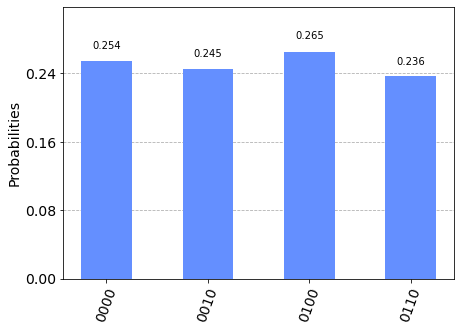

In [5]:
from qiskit.visualization import plot_histogram
plot_histogram(c)

In [6]:
pd1 = {1:0}
same_pauli_dicts(pd1, {})

True

In [7]:
list(pd1.keys())

[1]

In [8]:
a = [0,2]
qc.measure(a,a)
qc.draw()

┌───┐                ┌───┐┌─────────┐┌───┐     ┌─┐            ┌─┐»
q_0: ┤ Z ├────────────────┤ X ├┤ Rz(π/4) ├┤ X ├─────┤M├────────────┤M├»
     ├───┤┌─────────┐┌───┐└─┬─┘└─────────┘└─┬─┘┌───┐└╥┘┌──────────┐└╥┘»
q_1: ┤ Y ├┤ Rx(π/2) ├┤ X ├──■───────────────■──┤ X ├─╫─┤ Rx(-π/2) ├─╫─»
     ├───┤└──┬───┬──┘└─┬─┘                     └─┬─┘ ║ └──┬───┬───┘ ║ »
q_2: ┤ X ├───┤ H ├─────■─────────────────────────■───╫────┤ H ├─────╫─»
     └───┘   └───┘                                   ║    └───┘     ║ »
q_3: ────────────────────────────────────────────────╫──────────────╫─»
                                                     ║              ║ »
c: 4/════════════════════════════════════════════════╩══════════════╩═»
                                                     0              0 »
«                         
«q_0: ────────────────────
«     ┌─────────┐   ┌─┐   
«q_1: ┤ Rx(π/2) ├───┤M├───
«     └──┬───┬──┘┌─┐└╥┘┌─┐
«q_2: ───┤ H ├───┤M├─╫─┤M├
«        └───┘   └╥┘ ║ └╥┘
«q_3: ────────────╫──╫──╫─
«                 ║  ║  ║ 
«c: 4/════════════╩══╩══╩═
«                 2  1  2

In [1]:
from hamiltonians import *

hm_list = [
    [ [3], [1.0], [(1,1)] ]
]
d=2
l=2
q_map = {(0,0): 0, (0,1): 1, (1,0): 2, (1,1): 3}
H = Hamiltonian(hm_list, d, l, q_map)

from qite_params import *

params = QITE_params(H)
params.load_hamiltonian_params(0)

from ideal_qite import *

Loading Hamiltonian Parameters... Calculating Unitary Domains... Done
Calculating Required Odd-Y Pauli Strings... Done
Calculating Required Pauli Measurements... Done
cupy failed to import


In [4]:
import numpy as np
sv = np.kron( np.kron( [1,0], [1,0] ), np.kron([1,0], [0,1]) )# * np.sqrt(0.5)
from qiskit import Aer
sv_sim = Aer.get_backend('statevector_simulator')
params.backend = sv_sim
measure_energy(params, sv)

1.0

In [4]:
def full_pauli_index(p, d1, d2):
        index = 0
        for i in range(len(d1)):
            gate = p % 4
            
            qbit = d1[i]
            # find the index of qbit in d2
            j=0
            while d2[j] != qbit:
                j += 1
                if j == len(d2):
                    raise ValueError('Element {} not found in domain {}'.format(d1[i],d2) )

            index += gate * 4**j
            p = p//4
        return index

In [8]:
d1 = [3,0,5]
d2 = [0,1,2,3,4,5]
p = 1*1 + 3*4 + 2*16
from helpers import *
pp = full_pauli_index(p,d1,d2)
int_to_base(pp, 4, len(d2))

[3, 0, 0, 1, 0, 2]

In [14]:
import numpy as np

z = 3+4j
print(z.conjugate())
print(z)

(3-4j)
(3+4j)


In [83]:
from ideal_qite import *
from hamiltonians import *
from qiskit import Aer

hm_list = [
    [[1], [1], [0]],
#    [[1,3], [1,1], [(1,1)]],
#    [[1,3], [1,1], [(0,0),(1,0)]],
]
d=1
l=1
qmap = {(0,0): 0, (0,1):1, (1,0): 2,  (1,1):3}
H = Hamiltonian(hm_list, d, l)#, qmap)
H.multiply_scalar(1j)
D = 0

db = 0.1
delta = 0.1
N = 20
num_shots=0
backend = Aer.get_backend('statevector_simulator')


from qite_params import QITE_params

params = QITE_params(H)
params.load_hamiltonian_params(D, False)
params.set_run_params(db, delta, N, num_shots, backend)

Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
	Calculating Required Pauli Measurements... Done


In [84]:
E,times, svs, alist = qite(params)

Starting Ideal QITE Simulation:
Iteration 1... Done -- Iteration time = 0.08 seconds
Iteration 2... Done -- Iteration time = 0.06 seconds
Iteration 3... Done -- Iteration time = 0.05 seconds
Iteration 4... 

C:\Users\CMP3KUMARS\Desktop\QITE\ideal_qite.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  E[0] = measure_energy(params, params.init_sv)
C:\Users\CMP3KUMARS\Desktop\QITE\ideal_qite.py:256: ComplexWarning: Casting complex values to real discards the imaginary part
  E[i] = measure_energy(params, psi)


Done -- Iteration time = 0.05 seconds
Iteration 5... Done -- Iteration time = 0.05 seconds
Iteration 6... Done -- Iteration time = 0.05 seconds
Iteration 7... Done -- Iteration time = 0.05 seconds
Iteration 8... Done -- Iteration time = 0.05 seconds
Iteration 9... Done -- Iteration time = 0.04 seconds
Iteration 10... Done -- Iteration time = 0.04 seconds
Iteration 11... Done -- Iteration time = 0.06 seconds
Iteration 12... Done -- Iteration time = 0.06 seconds
Iteration 13... Done -- Iteration time = 0.05 seconds
Iteration 14... Done -- Iteration time = 0.05 seconds
Iteration 15... Done -- Iteration time = 0.05 seconds
Iteration 16... Done -- Iteration time = 0.05 seconds
Iteration 17... Done -- Iteration time = 0.06 seconds
Iteration 18... Done -- Iteration time = 0.06 seconds
Iteration 19... Done -- Iteration time = 0.05 seconds
Iteration 20... Done -- Iteration time = 0.05 seconds


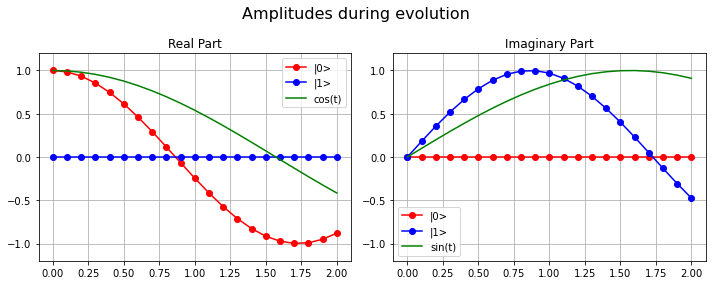

In [85]:
f = plt.figure(figsize=(10,4))
axs = [f.add_subplot(121), f.add_subplot(122)]
t = np.arange(0,N+1,1)*db
re = np.real(svs)
im = np.imag(svs)
axs[0].plot(t,re[:,0],'ro-', label='|0>')
axs[0].plot(t,re[:,1],'bo-', label='|1>')

# axs[0].axhline(y=np.sqrt(0.5))
# axs[0].axhline(y=-np.sqrt(0.5))

axs[0].plot(t,np.cos(t), 'g-', label='cos(t)')
axs[1].plot(t,im[:,0],'ro-', label='|0>')
axs[1].plot(t,im[:,1],'bo-', label='|1>')

axs[1].plot(t,np.sin(t), 'g-', label='sin(t)')

axs[0].set_ylim(-1.2,1.2)
axs[1].set_ylim(-1.2,1.2)

axs[0].title.set_text('Real Part')
axs[1].title.set_text('Imaginary Part')


axs[0].legend(loc='best')
axs[1].legend(loc='best')

axs[0].grid()
axs[1].grid()

f.suptitle('Amplitudes during evolution', fontsize=16)
f.tight_layout()
plt.show()

In [69]:
svs

array([[1.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j]])

In [68]:
E

array([0., 0., 0., 0., 0., 0.])

In [7]:
E = np.zeros(N + 1)
times = np.zeros(N+1)
svs = np.zeros((N+1, 2**params.nbits), dtype=complex)
alist = []

E[0] = measure_energy(params, params.init_sv)
svs[0] = params.init_sv.data

se = tomography(params, params.init_sv, alist, 0)

def full_pauli_index(p, d1, d2):
        index = 0
        for i in range(len(d1)):
            gate = p % 4
            
            qbit = d1[i]
            # find the index of qbit in d2
            j=0
            while d2[j] != qbit:
                j += 1
                if j == len(d2):
                    raise ValueError('Element {} not found in domain {}'.format(d1[i],d2) )

            index += gate * 4**j
            p = p//4
        return index
    
params.small_u_domain_flags

[False]

C:\Users\CMP3KUMARS\Anaconda3\envs\qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


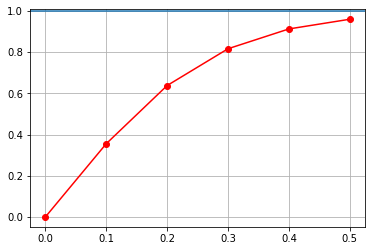

In [18]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0,N+1,1)*db, E, 'ro-')
plt.axhline(y=H.get_spectrum()[0][0])
plt.grid()
plt.show()